# 뇌출혈 위험요인 분석

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import scipy.stats as stats

In [40]:
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
df.shape

(5110, 12)

In [41]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 뇌졸중 발병 요인에 혈당 평균은 양의 상관관계가 있을 것이다.

필요한데이터
id  / unique identifier
avg_glucose / 환자 혈당 평균
stroke / 뇌졸중 발병 여부, 0, 1

In [43]:
df_glucose_level =  df[["avg_glucose_level","stroke","age"]]
df_glucose_level = df_glucose_level.copy()

df_glucose_level.head()

,avg_glucose_level,stroke,age
0,228.69,1,67.0
1,202.21,1,61.0
2,105.92,1,80.0
3,171.23,1,49.0
4,174.12,1,79.0


In [44]:
df_glucose_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_glucose_level  5110 non-null   float64
 1   stroke             5110 non-null   int64  
 2   age                5110 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 119.9 KB


In [45]:
#  결측치 확인 
df_glucose_level.isnull().sum()

avg_glucose_level    0
stroke               0
age                  0
dtype: int64

In [46]:
# 중복값 확인 
sum(df_glucose_level.duplicated())

17

In [47]:
# df["avg_glucose_level"] = df["avg_glucose_level"].astype('int')
b = df["avg_glucose_level"]
b
# df["avg_glucose_level"]

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

In [48]:
# 혈당수치 등급 분류 
blood_list= []
for b in b:
    if b <= 50:
        blood_list.append(4)
    elif b > 50 and b <= 80  :
        blood_list.append(5)
    elif b> 80 and b <= 115  :
        blood_list.append(6)
    elif b > 115 and b <= 150  :
        blood_list.append(7)
    elif b > 150 and b <= 180  :
        blood_list.append(8)
    elif b > 180 and b <= 215  :
        blood_list.append(9)
    elif b > 215 and b <= 250  :
        blood_list.append(10)       
    elif b > 250 and b <= 280  :
        blood_list.append(11)

    
df_glucose_level["blood_level"] = blood_list

In [49]:
# 연령대 분류
age_list=[]
for age in df["age"]:
    if age >= 0 and age <10:
        age_list.append("10대 이전")
    elif age >= 10 and age <20:
        age_list.append("10대")
    elif age >= 20 and age <30:
        age_list.append("20대")
    elif age >= 30 and age <40:
        age_list.append("30대")
    elif age >= 40 and age <50:
        age_list.append("40대")
    elif age >= 50 and age <60:
        age_list.append("50대")
    elif age >= 60 and age <70:
        age_list.append("60대")
    elif age >= 70 and age <80:
        age_list.append("70대")
    elif age >= 80 and age <90:
        age_list.append("80대")
    
df_glucose_level["age"] = age_list


In [55]:
# 전체 당뇨등급 분포 
all_df =df_glucose_level["blood_level"].value_counts( )
all_df

6     2336
5     1532
7      512
9      314
10     244
8      147
11      25
Name: blood_level, dtype: int64

In [57]:
# 뇌졸중 발병자중 당뇨등급분포 
df1 = df_glucose_level[(df_glucose_level['stroke']==1)]
blood_level_1 = df1["blood_level"].value_counts( )
blood_level_1

6     79
5     63
9     42
10    32
7     17
8     11
11     5
Name: blood_level, dtype: int64

In [58]:
# 혈당 등급별 유병율계산 
blood_level_1/ all_df *100

5      4.112272
6      3.381849
7      3.320312
8      7.482993
9     13.375796
10    13.114754
11    20.000000
Name: blood_level, dtype: float64

In [59]:
# 60대 이상인사람 혈당분포 
# df50 = df_glucose_level[(df_glucose_level['age']=="60대")
#                        |(df_glucose_level['age']=="70대")
#                        |(df_glucose_level['age']=="80대")]
# df50 = df50["blood_level"].value_counts( )
# df50


6     535
5     366
9     181
10    135
7      97
8      42
11     20
Name: blood_level, dtype: int64

In [65]:
# 60대 이상인사람중 뇌졸중이 있는사람 
# df50 = df_glucose_level[(df_glucose_level['stroke']==1)
#                        &(df_glucose_level['age']=="60대")
#                        |(df_glucose_level['age']=="70대")
#                        |(df_glucose_level['age']=="80대")]
# df50_1= df50["blood_level"].value_counts( )
# df50_1

6     287
5     214
9     115
10     89
7      60
8      25
11     12
Name: blood_level, dtype: int64

In [72]:
df1["stroke"].astype

<bound method NDFrame.astype of 0      1
1      1
2      1
3      1
4      1
      ..
244    1
245    1
246    1
247    1
248    1
Name: stroke, Length: 249, dtype: int64>

In [73]:
df1_1 = df_glucose_level[["stroke","blood_level"]]
df1_1.corr()

,stroke,blood_level
stroke,1.000000,0.126234
blood_level,0.126234,1.000000


<AxesSubplot:xlabel='blood_level', ylabel='Count'>

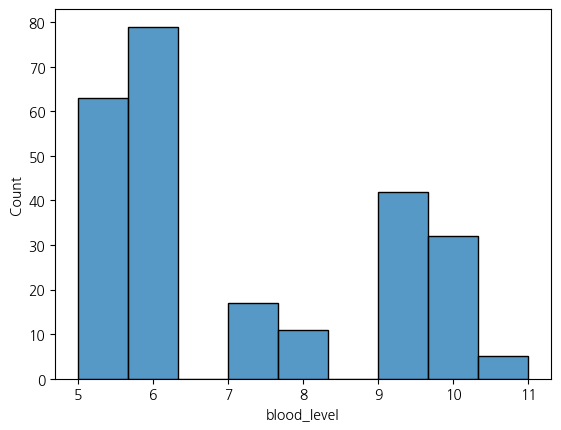

In [47]:
sns.histplot(data = df1, x="blood_level")

In [48]:
df0 = df_glucose_level[(df_glucose_level['stroke']==0)]
df0

,avg_glucose_level,stroke,blood_level
249,95.12,0,6
250,87.96,0,6
251,110.89,0,6
252,69.04,0,5
253,161.28,0,8
...,...,...,...
5105,83.75,0,6
5106,125.20,0,7
5107,82.99,0,6
5108,166.29,0,8


<AxesSubplot:xlabel='blood_level', ylabel='Count'>

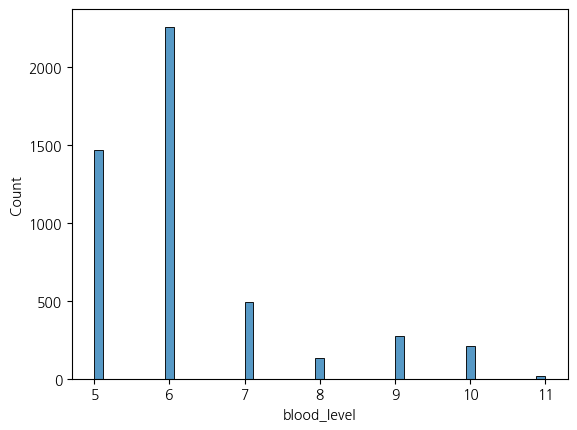

In [49]:
sns.histplot(data = df0, x="blood_level")

<AxesSubplot:>

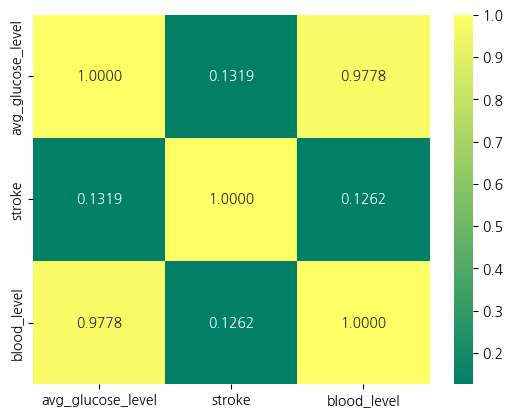

In [237]:
sns.heatmap(df_glucose_level.corr(), annot=True, fmt = '.4f', linewidths=0, cmap='summer')

# r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
# r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
# r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
# r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
# r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
# r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
# r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [53]:
df_level =df_glucose_level.groupby("stroke").corr()
df_level

avg_glucose_level  blood_level
stroke                                                  
0      avg_glucose_level           1.000000     0.976249
       blood_level                 0.976249     1.000000
1      avg_glucose_level           1.000000     0.988645
       blood_level                 0.988645     1.000000

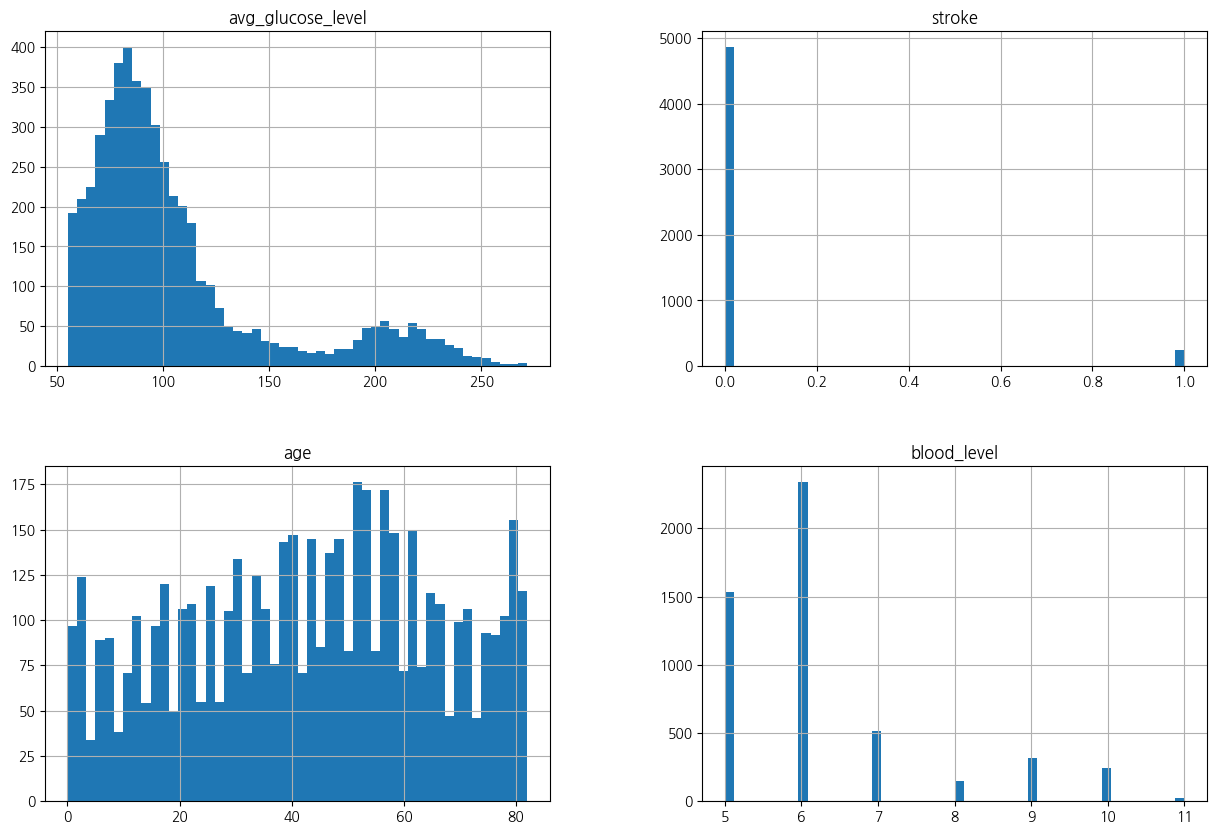

In [199]:
df_glucose_level.hist(bins=50,figsize=(15,10))
plt.show()

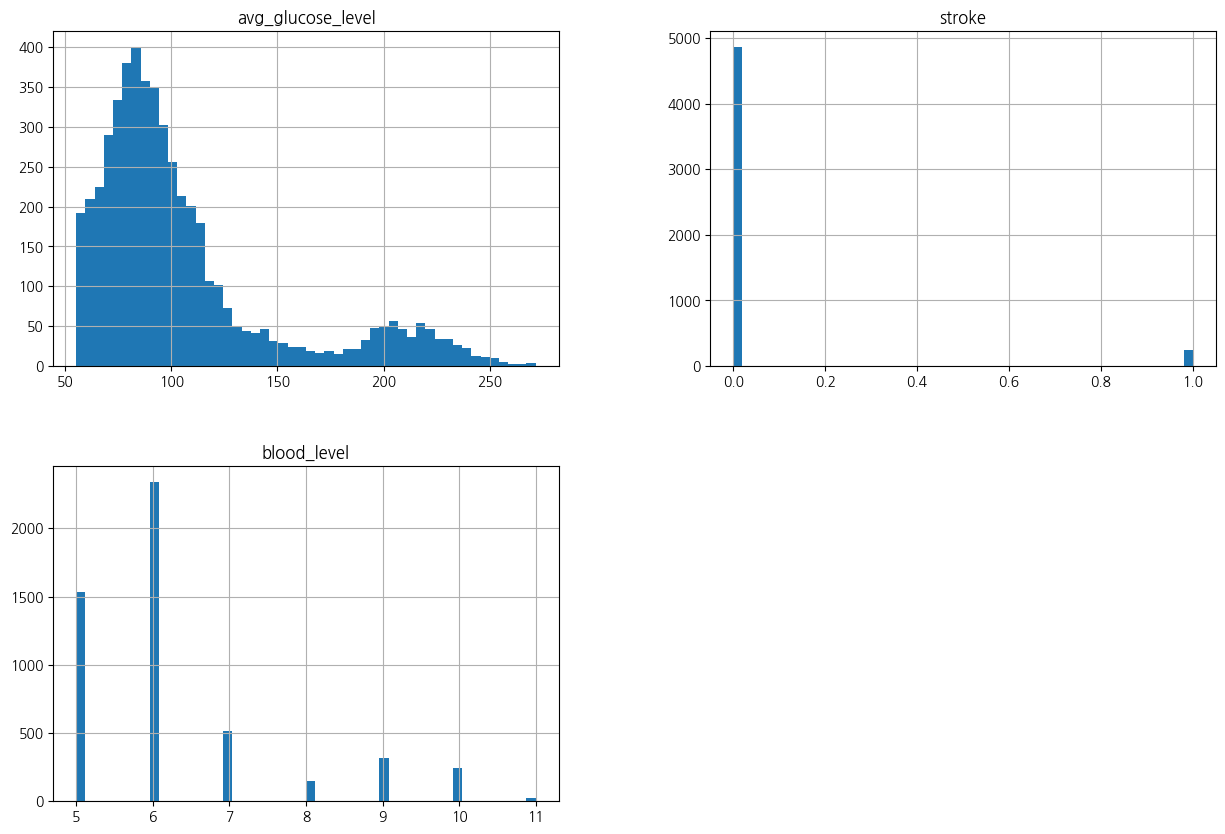

In [238]:
df_glucose_level.hist(bins=50,figsize=(15,10))
plt.show()

<AxesSubplot:>

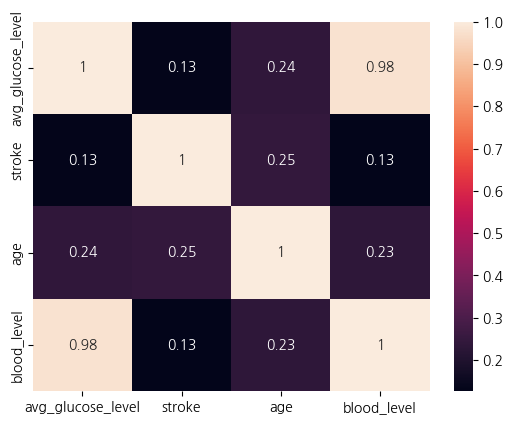

In [221]:
df_level_corr = df_glucose_level.corr()
df_level_corr
sns.heatmap(df_level_corr,annot=True,linewidths=0)

In [56]:
df_level_corr=df_glucose_level.groupby("blood_level").corr()
df_level_corr
# 그룹화하여 상관관계 확인

avg_glucose_level    stroke
blood_level                                               
5           avg_glucose_level           1.000000  0.008074
            stroke                      0.008074  1.000000
6           avg_glucose_level           1.000000  0.026805
            stroke                      0.026805  1.000000
7           avg_glucose_level           1.000000 -0.000493
            stroke                     -0.000493  1.000000
8           avg_glucose_level           1.000000  0.142026
            stroke                      0.142026  1.000000
9           avg_glucose_level           1.000000 -0.022741
            stroke                     -0.022741  1.000000
10          avg_glucose_level           1.000000  0.026922
            stroke                      0.026922  1.000000
11          avg_glucose_level           1.000000  0.138204
            stroke                      0.138204  1.000000

<AxesSubplot:ylabel='blood_level-None'>

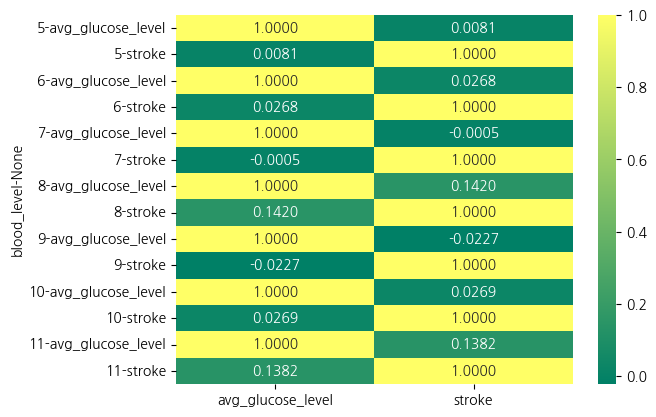

In [55]:
sns.heatmap(df_level_corr, annot=True, fmt = '.4f', linewidths=0, cmap='summer')

<AxesSubplot:xlabel='blood_level', ylabel='Count'>

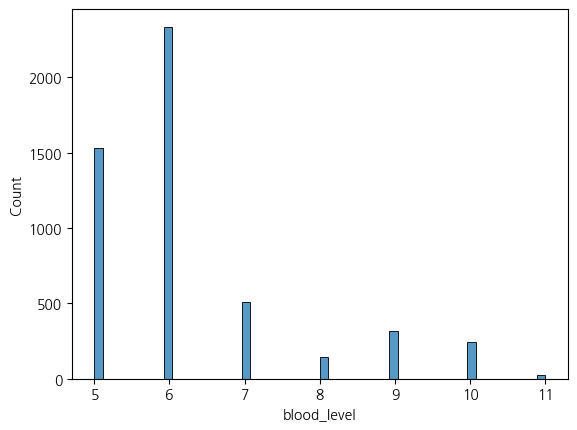

In [247]:
sns.histplot(data = df_glucose_level, x="blood_level")

<AxesSubplot:xlabel='blood_level', ylabel='Count'>

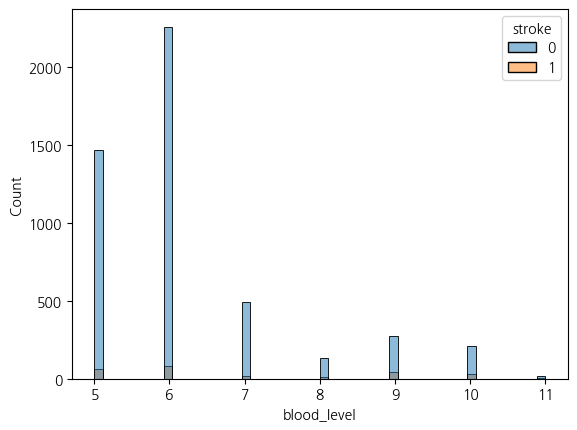

In [21]:
sns.histplot(data = df_glucose_level, x="blood_level",hue="stroke")

<AxesSubplot:>

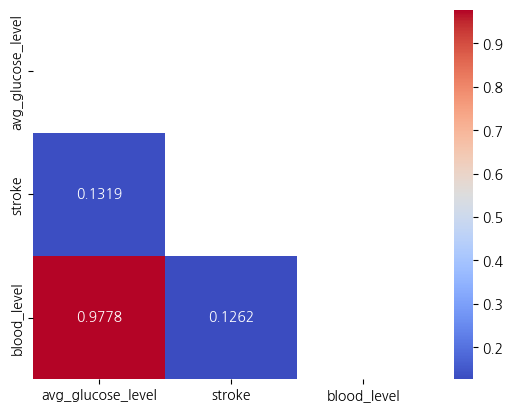

In [76]:
corr = df_glucose_level.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt = '.4f', linewidths=0, cmap='coolwarm',mask=mask)

In [80]:
df1_1 = df_glucose_level[["stroke","blood_level"]]
df1_1=df1_1.corr()

<AxesSubplot:>

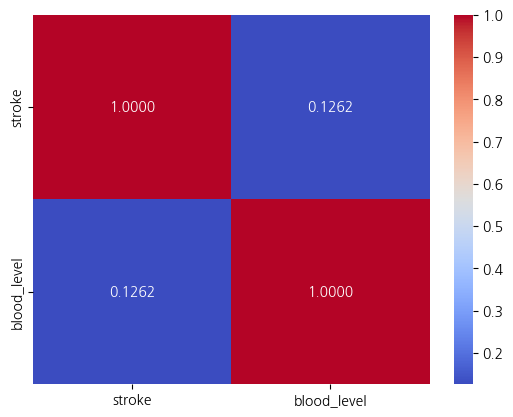

In [79]:
zcorr = df_glucose_level.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(df1_1, annot=True, fmt = '.4f', linewidths=0, cmap='coolwarm')

 시각화로 뇌졸중 환자의 분포가 혈당 고위험군보다 정상수치에서 더 많은 걸로 확인
혈당과 뇌졸중과의 상관관계가 최고치가 가장 높은 혈당 수치 단계에서 0.14 정도 
나머지도 소수점 2단위 수준으로 확인 
즉 r이 0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형 관계로서 둘은 상관관계가 없다고 생각되나 

전체 혈당분포와 뇌졸중 환자의 분포를 나눴을떄 발생율은 증가하는걸로 확인됩니다
